<a href="https://colab.research.google.com/github/jcdumlao14/Supervised-Learning-Algorithms--Challenge/blob/main/5_Challenge_NaiveBayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge - Naive Bayes Classifier**

##Credit Risk

###Predict if a loan application should be rejected or approved

# **Context**

Credit risks refer to the risks of loss on a debt that occurs when the borrower fails to repay the principal and related interest amounts of a loan back to the lender on due dates.

When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision for its approval or rejection. There are two types of risks associated with this decision:

* If the applicant has good credit risk, i.e. is likely to repay the loan, then rejecting the loan results in a loss to the bank

* If the applicant has bad credit risk, i.e. is unlikely to repay the loan, then approving the loan results in a loss to the bank

It may be assumed that the second risk is a greater risk, as the bank (or any other institution lending the money to an untrustworthy party) had a higher chance of not being paid back the borrowed amount.

So it's on the part of the bank or other lending authority to evaluate the risks associated with lending money to a customer.

# **Problem Statement**

Imagine a bank in your locality. The bank has realized that applying data science methodologies can help them focus their resources efficiently, make smarter decisions on credit risk calculations, and improve performance.

Earlier they used to check the credit risk of the loan applicants manually by analyzing their bank-related data, which used to take months of time. But this time they want a smart data scientist who can automate this process.

# **Objective**

You are required to build a machine learning model that helps you predict the credit risk of the loan applicants.



Evaluation Criteria Submissions are evaluated using the Accuracy Score.

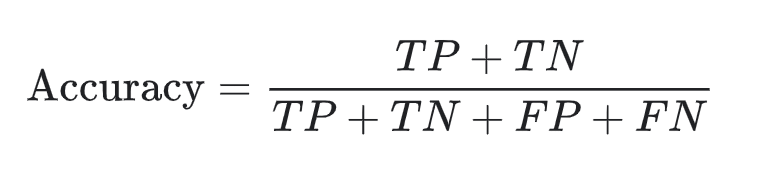


# **About the Data**

This dataset classifies loan applicants described by a set of attributes as good or bad credit risks.

To load the training data in your jupyter notebook, use the below command:

import pandas as pd

audit_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/training_set_labels.csv" )

# **Data Description**

There are 20 attributes in the dataset. Some of them are mentioned below:

* checking_status: Status of the existing checking account
* duration: Duration in month
*  credit_history: Credit history of the applicant
* purpose: Purpose of taking the earlier loans
* employment: Present employment since
* installment_commitment: Installment rate in percentage of disposable income
* personal_status: Personal status and sex
* other_parties: Other debtors/guarantors
* residence_since: Present residence since
* other_payment_plans: Other installment plans
* existing_credits: Number of existing credits at this bank
* class: The target variable(good, bad)

# **Test Dataset**

Load the test data (name it as test_data). You can load the data using the below command.

test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/testing_set_labels.csv')

Here the target column is deliberately not there as you need to predict it

# **Loading Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix,classification_report, fbeta_score # to evaluate our model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)


In [ ]:
import plotly.express as px
from matplotlib import style
#styling the outputs
font={'family':'sans-serif',
      'weight':'bold',
      'size':18}
plt.rc('font',**font)
style.use('fivethirtyeight')


# **Loading Data**

In [ ]:
audit_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/training_set_labels.csv")


In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/testing_set_labels.csv')


In [ ]:
audit_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'no checking',18,'critical/other existing credit',radio/tv,1800,'<100','1<=X<4',4,'male single',none,2,car,24,none,own,2,skilled,1,none,yes,good
1,'<0',24,'existing paid',radio/tv,2439,'<100','<1',4,'female div/dep/mar',none,4,'real estate',35,none,own,1,skilled,1,yes,yes,bad
2,'no checking',36,'no credits/all paid',repairs,2613,'<100','1<=X<4',4,'male single',none,2,car,27,none,own,2,skilled,1,none,yes,good
3,'no checking',15,'existing paid',education,4623,'100<=X<500','1<=X<4',3,'male single',none,2,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
4,'<0',21,'existing paid',furniture/equipment,3599,'<100','4<=X<7',1,'female div/dep/mar',none,4,car,26,none,rent,1,'unskilled resident',1,none,yes,good


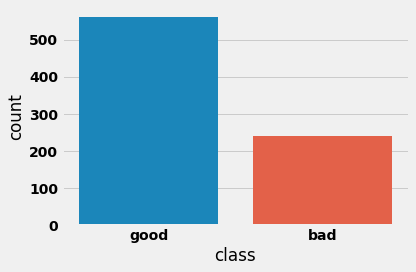

In [ ]:
##check for Imbalance data
#count plot on single categorical variable
sns.countplot(x = 'class',data = audit_data)

#show the plot
plt.tight_layout()

In [ ]:
# checking Unique Values for each Column
for col in audit_data.columns:
    print(col,':',audit_data[col].nunique())
    print(audit_data[col].unique())
    print('---'*3)

checking_status : 4
["'no checking'" "'<0'" "'0<=X<200'" "'>=200'"]
---------
duration : 32
[18 24 36 15 21 12 48  9  4 45 30  7  6 42  8 10 39 20  5 27 11 60 33 14
 28 13 40 47 22 16 54 26]
---------
credit_history : 5
["'critical/other existing credit'" "'existing paid'"
 "'no credits/all paid'" "'all paid'" "'delayed previously'"]
---------
purpose : 10
['radio/tv' 'repairs' 'education' 'furniture/equipment' 'business'
 "'used car'" "'new car'" 'retraining' 'other' "'domestic appliance'"]
---------
credit_amount : 751
[ 1800  2439  2613  4623  3599  5801  2659  4844  7814  2462  3617  6758
  3621   458  2923  3590  1131  1544  2825  1845  6948  1240  1037  9960
  1474  1295  1313  1842  2910  2022  1239  4811  4280   339  3181   730
  4308  1740 12612  2375   428  2991   959  6568  1919  1200  2600  1409
  4351  1498  1449  1282  4675  4370  5096  1526  4473   590  1414  3835
  1533   929   683  3914  1249  2647  6615  3398  8072  1330  1264  7166
  1103  5771  2503   571  6199  135

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encod_list=['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker']

for col in label_encod_list:
    lenc=LabelEncoder()
    audit_data[col]=lenc.fit_transform(audit_data[col])
    test_data[col]=lenc.transform(test_data[col])
    
audit_data['class']=lenc.fit_transform(audit_data['class'])

In [ ]:
audit_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,3,18,1,7,1800,2,0,4,3,2,2,3,24,1,1,2,3,1,0,1,1
1,1,24,3,7,2439,2,2,4,0,2,4,2,35,1,1,1,3,1,1,1,0
2,3,36,4,8,2613,2,0,4,3,2,2,3,27,1,1,2,3,1,0,1,1
3,3,15,3,4,4623,0,0,3,3,2,2,0,40,1,1,1,0,1,1,1,0
4,1,21,3,5,3599,2,1,1,0,2,4,3,26,1,2,1,2,1,0,1,1


# **Exploratory Analysis**

In [ ]:
#check the dataset size
data_rows =audit_data.shape[0]
data_columns = audit_data.shape[1]
print(f'This dataset have {data_rows} rows and {data_columns} columns.')

This dataset have 800 rows and 21 columns.


In [ ]:
audit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   checking_status         800 non-null    int64
 1   duration                800 non-null    int64
 2   credit_history          800 non-null    int64
 3   purpose                 800 non-null    int64
 4   credit_amount           800 non-null    int64
 5   savings_status          800 non-null    int64
 6   employment              800 non-null    int64
 7   installment_commitment  800 non-null    int64
 8   personal_status         800 non-null    int64
 9   other_parties           800 non-null    int64
 10  residence_since         800 non-null    int64
 11  property_magnitude      800 non-null    int64
 12  age                     800 non-null    int64
 13  other_payment_plans     800 non-null    int64
 14  housing                 800 non-null    int64
 15  existing_credits       

In [ ]:
#Null values
audit_data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [ ]:
#N/A values
audit_data.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

# **Statistical Summary**

In [ ]:
#Statistics summary
audit_data.describe()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,1.563750,21.031250,2.188750,4.123750,3337.878750,2.130000,1.550000,2.945000,1.850000,1.863750,2.878750,1.697500,35.631250,0.908750,1.078750,1.410000,2.310000,1.142500,0.405000,0.965000,0.700000
std,1.248152,12.171502,1.067496,2.451724,2866.828413,1.122352,1.344343,1.118498,1.353621,0.453258,1.092264,1.157657,11.757682,0.425029,0.536571,0.574293,1.078357,0.349781,0.491199,0.183895,0.458544
min,0.000000,4.000000,0.000000,0.000000,250.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1.000000,2.000000,1364.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,1.000000,26.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,18.000000,3.000000,5.000000,2332.000000,2.000000,1.000000,3.000000,3.000000,2.000000,3.000000,2.000000,33.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
75%,3.000000,24.000000,3.000000,7.000000,4166.000000,2.000000,3.000000,4.000000,3.000000,2.000000,4.000000,3.000000,42.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,60.000000,4.000000,9.000000,18424.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,3.000000,75.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


In [ ]:
#numerical variables
num_cols = pd.DataFrame(audit_data[audit_data.select_dtypes(include=['float','int']).columns])
#print the numerical variables
num_cols.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

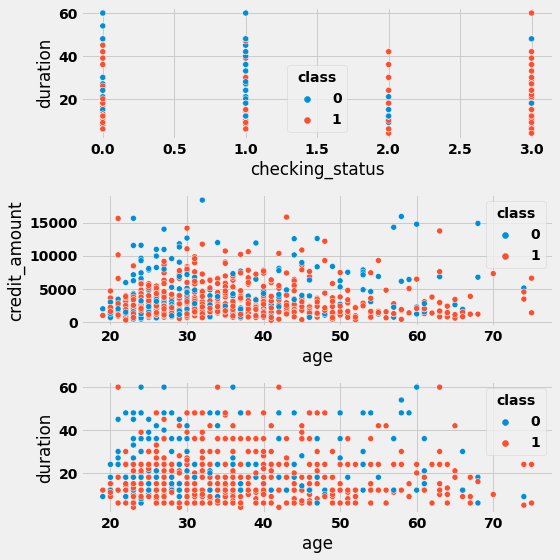

In [ ]:
def scatters(data, h=None, pal=None):
  fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8,8))
  sns.scatterplot(x="checking_status",y ="duration", hue=h, palette=pal, data=data, ax=ax1)
  sns.scatterplot(x="age",y ="credit_amount", hue=h, palette=pal, data=data, ax=ax2)
  sns.scatterplot(x="age",y ="duration", hue=h, palette=pal, data=data, ax=ax3)

scatters(audit_data, h='class')
plt.tight_layout()



In [ ]:
# checking whether Dataset is balanced or not
audit_data['class'].value_counts(normalize=True)

1    0.7
0    0.3
Name: class, dtype: float64

In [ ]:
drop_col=['class']
col_need=['checking_status', 'duration','savings_status','other_payment_plans']

In [ ]:
audit_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,3,18,1,7,1800,2,0,4,3,2,2,3,24,1,1,2,3,1,0,1,1
1,1,24,3,7,2439,2,2,4,0,2,4,2,35,1,1,1,3,1,1,1,0
2,3,36,4,8,2613,2,0,4,3,2,2,3,27,1,1,2,3,1,0,1,1
3,3,15,3,4,4623,0,0,3,3,2,2,0,40,1,1,1,0,1,1,1,0
4,1,21,3,5,3599,2,1,1,0,2,4,3,26,1,2,1,2,1,0,1,1


# **Model Training**

In [ ]:
# assigning X and y
X=audit_data.drop(drop_col,axis=1)
#X=audit_data[col_need]
y=audit_data['class']


In [ ]:
X.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,3,18,1,7,1800,2,0,4,3,2,2,3,24,1,1,2,3,1,0,1
1,1,24,3,7,2439,2,2,4,0,2,4,2,35,1,1,1,3,1,1,1
2,3,36,4,8,2613,2,0,4,3,2,2,3,27,1,1,2,3,1,0,1
3,3,15,3,4,4623,0,0,3,3,2,2,0,40,1,1,1,0,1,1,1
4,1,21,3,5,3599,2,1,1,0,2,4,3,26,1,2,1,2,1,0,1


In [ ]:
# split datasets into training and test subsets for both X and y using sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, stratify=y,random_state=42)


In [ ]:
# Create a series of outcome variable only
y = audit_data['class']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(640, 20)
(160, 20)
(640,)
(160,)


# **Evaluate the model**

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

#instantiate the model (using the defalut parameters)
lr = LogisticRegression()


In [ ]:
#fit the model with data
lr.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix


array([[ 15,  33],
       [  7, 105]])

Text(0.5, 257.44, 'Predicted Label')

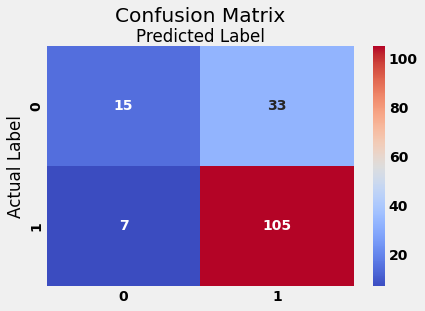

In [ ]:
class_names = ['0','1'] #names of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap="coolwarm",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test.ravel(),y_pred))
print("Precision:",metrics.precision_score(y_test.ravel(),y_pred))
print("Recall:",metrics.recall_score(y_test.ravel(),y_pred))
print("F1 Score:",metrics.recall_score(y_test.ravel(),y_pred))

Accuracy: 0.75
Precision: 0.7608695652173914
Recall: 0.9375
F1 Score: 0.9375


Receiver Operating Characteristic -ROC Curve

The receiver operating characteristic curve is a plot of the true positive rate against the false positive rate. Its shows the tradeoff between sensitivity and specificity.

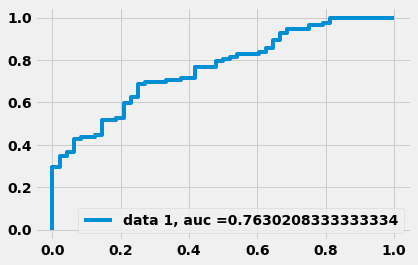

In [ ]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label ="data 1, auc ="+ str(auc))
plt.legend(loc=4)
plt.show()

The AUC score for the case is 0.76. AUC score 1 represents a perfect classifier, and __ represents a worthless classifier.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

#create a Gaussian Classifier
nb = GaussianNB()

#Train the model using the training sets
nb.fit(X_train, y_train)
y_pred=nb.predict(X_test) 


In [ ]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[20, 28],
       [21, 91]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1 Score:",metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.69375
Precision: 0.7647058823529411
Recall: 0.8125
F1 Score: 0.69375


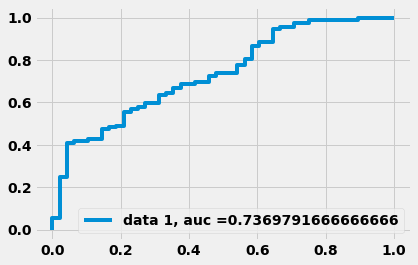

In [ ]:
y_pred_proba = nb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label ="data 1, auc ="+ str(auc))
plt.legend(loc=4)
plt.show()

Random Forest

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#create a Gaussian Classifier
rf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 13,  35],
       [  5, 107]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1 Score:",metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.75
Precision: 0.7535211267605634
Recall: 0.9553571428571429
F1 Score: 0.75


SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
# train the model
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svc_model.fit(X_train, y_train).predict(X_test)


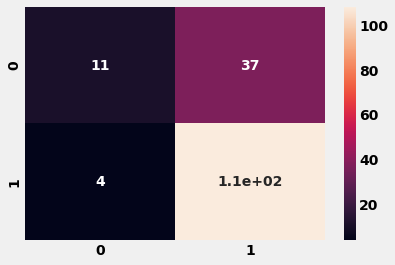

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.23      0.35        48
           1       0.74      0.96      0.84       112

    accuracy                           0.74       160
   macro avg       0.74      0.60      0.59       160
weighted avg       0.74      0.74      0.69       160



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.74375

# **Improving the model**


In [ ]:
min_train = X_train.min()
min_train

0.0

In [ ]:
range_train = (X_train - min_train).max()
range_train

1.0

In [ ]:
X_train_scaled = (X_train - min_train)/range_train
X_train_scaled

array([[0.        , 0.14285714, 0.75      , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.03571429, 0.75      , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.10714286, 0.75      , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.14285714, 0.75      , ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.35714286, 0.5       , ..., 1.        , 0.        ,
        1.        ],
       [0.33333333, 0.78571429, 1.        , ..., 1.        , 0.        ,
        1.        ]])

In [ ]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [ ]:
clf_model1 = RandomForestClassifier(n_estimators=100)
clf_model1.fit(X_train_scaled, y_train)

RandomForestClassifier()

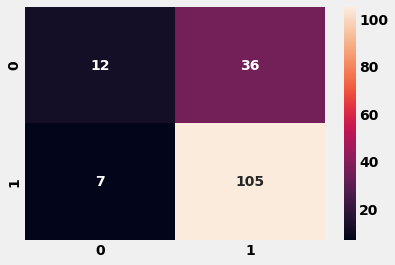

In [ ]:
y_predict = clf_model1.predict(X_test_scaled)
cm1 = confusion_matrix(y_test, y_predict)

sns.heatmap(cm1,annot=True,fmt="d")

In [ ]:
accuracy_score(y_test, y_predict)

0.73125